In [1]:
import geopandas as gpd # Generalmente la librería geopandas se abrevia gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fiona

In [2]:
puntos = gpd.read_file('enteric-fermentation-cattle-pasture-emissions-mexico-june-2024.gpkg')

/home/codespace/.python/current/lib/python3.12/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'enteric-fermentation-cattle-pasture-emissions-mexico-june-2024.gpkg': 'enteric-fermentation-cattle-pasture-emissions-june-2024' (default), 'mexico', 'mexico-estados'. Specify layer parameter to avoid this warning.
  result = read_func(


In [3]:
layers = fiona.listlayers('enteric-fermentation-cattle-pasture-emissions-mexico-june-2024.gpkg')
print(layers)

['enteric-fermentation-cattle-pasture-emissions-june-2024', 'mexico', 'mexico-estados']


In [4]:
puntos.head()

,source_id,source_name,start_time,end_time,lat,lon,geometry_ref,emissions_quantity,activity,emissions_factor,capacity,other1,other2,native_source_id,geometry
0,21231494,Abal� Municipality,6/1/2024 0:00,6/30/2024 0:00,20.655196,-89.650384,gadm_MEX.31.1_2,8.373833,1794.39270,0.004667,1794.39270,MEX.31_1,MEX.31.1_2,MEX.31.1_2,POINT (-89.65038 20.6552)
1,21217225,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,27.122395,-101.245782,gadm_MEX.7.1_2,102.329782,21927.81044,0.004667,21927.81044,MEX.7_1,MEX.7.1_2,MEX.7.1_2,POINT (-101.24578 27.12239)
2,21221325,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,20.533231,-101.536012,gadm_MEX.11.1_2,14.944945,3202.48826,0.004667,3202.48826,MEX.11_1,MEX.11.1_2,MEX.11.1_2,POINT (-101.53601 20.53323)
3,21223942,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,25.940543,-100.405942,gadm_MEX.19.1_2,4.950798,1060.88519,0.004667,1060.88519,MEX.19_1,MEX.19.1_2,MEX.19.1_2,POINT (-100.40594 25.94054)
4,21229981,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,24.133989,-98.268292,gadm_MEX.28.1_2,176.682482,37860.53202,0.004667,37860.53202,MEX.28_1,MEX.28.1_2,MEX.28.1_2,POINT (-98.26829 24.13399)


In [5]:
estados =  gpd.read_file('enteric-fermentation-cattle-pasture-emissions-mexico-june-2024.gpkg', layer='mexico-estados')

In [6]:
estados.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Aguascalientes,MX-AGU,31927357B17004778023462,MEX,ADM1,"MULTIPOLYGON (((-101.86167 22.02888, -101.8605..."
1,Baja California,MX-BCN,31927357B35339934753022,MEX,ADM1,"MULTIPOLYGON (((-114.1288 28.01224, -114.12369..."
2,Baja California Sur,MX-BCS,31927357B33389180120223,MEX,ADM1,"MULTIPOLYGON (((-110.34078 24.28615, -110.3391..."
3,Campeche,MX-CAM,31927357B84428150771724,MEX,ADM1,"MULTIPOLYGON (((-91.55007 18.28726, -91.55272 ..."
4,Chiapas,MX-CHP,31927357B65177449444732,MEX,ADM1,"MULTIPOLYGON (((-92.77034 15.15128, -92.77328 ..."


In [7]:
print(estados.crs)
print(puntos.crs)

# Ponerlos en el mismo sistema de referencia
puntos = puntos.to_crs(estados.crs)

# Verificar que ahora sí están en el mismo sistema de referencia
print(estados.crs)
print(puntos.crs)

EPSG:4326
GEOGCS["WGS 84 (CRS84)",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH],AUTHORITY["OGC","CRS84"]]
EPSG:4326
EPSG:4326


In [8]:
municipios_con_estado = gpd.sjoin(puntos, estados, how='left', predicate='within')

In [9]:
municipios_con_estado

,source_id,source_name,start_time,end_time,lat,lon,geometry_ref,emissions_quantity,activity,emissions_factor,...,other1,other2,native_source_id,geometry,index_right,shapeName,shapeISO,shapeID,shapeGroup,shapeType
0,21231494,Abal� Municipality,6/1/2024 0:00,6/30/2024 0:00,20.655196,-89.650384,gadm_MEX.31.1_2,8.373833,1794.39270,0.004667,...,MEX.31_1,MEX.31.1_2,MEX.31.1_2,POINT (-89.65038 20.6552),30.0,Yucatan,MX-YUC,31927357B35199150741361,MEX,ADM1
1,21217225,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,27.122395,-101.245782,gadm_MEX.7.1_2,102.329782,21927.81044,0.004667,...,MEX.7_1,MEX.7.1_2,MEX.7.1_2,POINT (-101.24578 27.12239),6.0,Coahuila de Zaragoza,MX-COA,31927357B32124965101143,MEX,ADM1
2,21221325,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,20.533231,-101.536012,gadm_MEX.11.1_2,14.944945,3202.48826,0.004667,...,MEX.11_1,MEX.11.1_2,MEX.11.1_2,POINT (-101.53601 20.53323),10.0,Guanajuato,MX-GUA,31927357B33104012885361,MEX,ADM1
3,21223942,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,25.940543,-100.405942,gadm_MEX.19.1_2,4.950798,1060.88519,0.004667,...,MEX.19_1,MEX.19.1_2,MEX.19.1_2,POINT (-100.40594 25.94054),18.0,Nuevo Leon,MX-NLE,31927357B30741484985331,MEX,ADM1
4,21229981,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,24.133989,-98.268292,gadm_MEX.28.1_2,176.682482,37860.53202,0.004667,...,MEX.28_1,MEX.28.1_2,MEX.28.1_2,POINT (-98.26829 24.13399),27.0,Tamaulipas,MX-TAM,31927357B88239390016047,MEX,ADM1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,21223768,Zumpahuac�n Municipality,6/1/2024 0:00,6/30/2024 0:00,18.800117,-99.554089,gadm_MEX.15.124_2,6.138902,1315.47899,0.004667,...,MEX.15_1,MEX.15.124_2,MEX.15.124_2,POINT (-99.55409 18.80012),14.0,Mexico,MX-MEX,31927357B41082348713023,MEX,ADM1
2301,21223769,Zumpango Municipality,6/1/2024 0:00,6/30/2024 0:00,19.809107,-99.071821,gadm_MEX.15.125_2,0.899099,192.66404,0.004667,...,MEX.15_1,MEX.15.125_2,MEX.15.125_2,POINT (-99.07182 19.80911),14.0,Mexico,MX-MEX,31927357B41082348713023,MEX,ADM1
2302,21230358,�lamo Temapache Municipality,6/1/2024 0:00,6/30/2024 0:00,20.971187,-97.710425,gadm_MEX.30.8_2,14.753057,3161.36920,0.004667,...,MEX.30_1,MEX.30.8_2,MEX.30.8_2,POINT (-97.71043 20.97119),29.0,Veracruz de Ignacio de la Llave,MX-VER,31927357B5337219705256,MEX,ADM1
2303,21223772,�lvaro Obreg�n Municipality,6/1/2024 0:00,6/30/2024 0:00,19.873537,-101.021758,gadm_MEX.16.3_2,5.988957,1283.34804,0.004667,...,MEX.16_1,MEX.16.3_2,MEX.16.3_2,POINT (-101.02176 19.87354),15.0,Michoacan de Ocampo,MX-MIC,31927357B49073316106075,MEX,ADM1


In [10]:
municipios_con_estado = municipios_con_estado[municipios_con_estado['shapeName'].notna()]

In [11]:
municipios_con_estado

,source_id,source_name,start_time,end_time,lat,lon,geometry_ref,emissions_quantity,activity,emissions_factor,...,other1,other2,native_source_id,geometry,index_right,shapeName,shapeISO,shapeID,shapeGroup,shapeType
0,21231494,Abal� Municipality,6/1/2024 0:00,6/30/2024 0:00,20.655196,-89.650384,gadm_MEX.31.1_2,8.373833,1794.39270,0.004667,...,MEX.31_1,MEX.31.1_2,MEX.31.1_2,POINT (-89.65038 20.6552),30.0,Yucatan,MX-YUC,31927357B35199150741361,MEX,ADM1
1,21217225,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,27.122395,-101.245782,gadm_MEX.7.1_2,102.329782,21927.81044,0.004667,...,MEX.7_1,MEX.7.1_2,MEX.7.1_2,POINT (-101.24578 27.12239),6.0,Coahuila de Zaragoza,MX-COA,31927357B32124965101143,MEX,ADM1
2,21221325,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,20.533231,-101.536012,gadm_MEX.11.1_2,14.944945,3202.48826,0.004667,...,MEX.11_1,MEX.11.1_2,MEX.11.1_2,POINT (-101.53601 20.53323),10.0,Guanajuato,MX-GUA,31927357B33104012885361,MEX,ADM1
3,21223942,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,25.940543,-100.405942,gadm_MEX.19.1_2,4.950798,1060.88519,0.004667,...,MEX.19_1,MEX.19.1_2,MEX.19.1_2,POINT (-100.40594 25.94054),18.0,Nuevo Leon,MX-NLE,31927357B30741484985331,MEX,ADM1
4,21229981,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,24.133989,-98.268292,gadm_MEX.28.1_2,176.682482,37860.53202,0.004667,...,MEX.28_1,MEX.28.1_2,MEX.28.1_2,POINT (-98.26829 24.13399),27.0,Tamaulipas,MX-TAM,31927357B88239390016047,MEX,ADM1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,21223768,Zumpahuac�n Municipality,6/1/2024 0:00,6/30/2024 0:00,18.800117,-99.554089,gadm_MEX.15.124_2,6.138902,1315.47899,0.004667,...,MEX.15_1,MEX.15.124_2,MEX.15.124_2,POINT (-99.55409 18.80012),14.0,Mexico,MX-MEX,31927357B41082348713023,MEX,ADM1
2301,21223769,Zumpango Municipality,6/1/2024 0:00,6/30/2024 0:00,19.809107,-99.071821,gadm_MEX.15.125_2,0.899099,192.66404,0.004667,...,MEX.15_1,MEX.15.125_2,MEX.15.125_2,POINT (-99.07182 19.80911),14.0,Mexico,MX-MEX,31927357B41082348713023,MEX,ADM1
2302,21230358,�lamo Temapache Municipality,6/1/2024 0:00,6/30/2024 0:00,20.971187,-97.710425,gadm_MEX.30.8_2,14.753057,3161.36920,0.004667,...,MEX.30_1,MEX.30.8_2,MEX.30.8_2,POINT (-97.71043 20.97119),29.0,Veracruz de Ignacio de la Llave,MX-VER,31927357B5337219705256,MEX,ADM1
2303,21223772,�lvaro Obreg�n Municipality,6/1/2024 0:00,6/30/2024 0:00,19.873537,-101.021758,gadm_MEX.16.3_2,5.988957,1283.34804,0.004667,...,MEX.16_1,MEX.16.3_2,MEX.16.3_2,POINT (-101.02176 19.87354),15.0,Michoacan de Ocampo,MX-MIC,31927357B49073316106075,MEX,ADM1


In [12]:
# drop the first four columns by their names

cols_to_drop = municipios_con_estado.columns[:4]
municipios_con_estado = municipios_con_estado.drop(columns=cols_to_drop)

In [13]:
municipios_con_estado["shapeType"].unique()

array(['ADM1'], dtype=object)

In [14]:
municipios_con_estado["shapeGroup"].unique()

array(['MEX'], dtype=object)

In [15]:
municipios_con_estado

,lat,lon,geometry_ref,emissions_quantity,activity,emissions_factor,capacity,other1,other2,native_source_id,geometry,index_right,shapeName,shapeISO,shapeID,shapeGroup,shapeType
0,20.655196,-89.650384,gadm_MEX.31.1_2,8.373833,1794.39270,0.004667,1794.39270,MEX.31_1,MEX.31.1_2,MEX.31.1_2,POINT (-89.65038 20.6552),30.0,Yucatan,MX-YUC,31927357B35199150741361,MEX,ADM1
1,27.122395,-101.245782,gadm_MEX.7.1_2,102.329782,21927.81044,0.004667,21927.81044,MEX.7_1,MEX.7.1_2,MEX.7.1_2,POINT (-101.24578 27.12239),6.0,Coahuila de Zaragoza,MX-COA,31927357B32124965101143,MEX,ADM1
2,20.533231,-101.536012,gadm_MEX.11.1_2,14.944945,3202.48826,0.004667,3202.48826,MEX.11_1,MEX.11.1_2,MEX.11.1_2,POINT (-101.53601 20.53323),10.0,Guanajuato,MX-GUA,31927357B33104012885361,MEX,ADM1
3,25.940543,-100.405942,gadm_MEX.19.1_2,4.950798,1060.88519,0.004667,1060.88519,MEX.19_1,MEX.19.1_2,MEX.19.1_2,POINT (-100.40594 25.94054),18.0,Nuevo Leon,MX-NLE,31927357B30741484985331,MEX,ADM1
4,24.133989,-98.268292,gadm_MEX.28.1_2,176.682482,37860.53202,0.004667,37860.53202,MEX.28_1,MEX.28.1_2,MEX.28.1_2,POINT (-98.26829 24.13399),27.0,Tamaulipas,MX-TAM,31927357B88239390016047,MEX,ADM1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,18.800117,-99.554089,gadm_MEX.15.124_2,6.138902,1315.47899,0.004667,1315.47899,MEX.15_1,MEX.15.124_2,MEX.15.124_2,POINT (-99.55409 18.80012),14.0,Mexico,MX-MEX,31927357B41082348713023,MEX,ADM1
2301,19.809107,-99.071821,gadm_MEX.15.125_2,0.899099,192.66404,0.004667,192.66404,MEX.15_1,MEX.15.125_2,MEX.15.125_2,POINT (-99.07182 19.80911),14.0,Mexico,MX-MEX,31927357B41082348713023,MEX,ADM1
2302,20.971187,-97.710425,gadm_MEX.30.8_2,14.753057,3161.36920,0.004667,3161.36920,MEX.30_1,MEX.30.8_2,MEX.30.8_2,POINT (-97.71043 20.97119),29.0,Veracruz de Ignacio de la Llave,MX-VER,31927357B5337219705256,MEX,ADM1
2303,19.873537,-101.021758,gadm_MEX.16.3_2,5.988957,1283.34804,0.004667,1283.34804,MEX.16_1,MEX.16.3_2,MEX.16.3_2,POINT (-101.02176 19.87354),15.0,Michoacan de Ocampo,MX-MIC,31927357B49073316106075,MEX,ADM1


In [16]:
municipios_con_estado = municipios_con_estado.drop(columns=["shapeType", "shapeGroup", "other1", "other2", "native_source_id", "shapeID"])

In [17]:
municipios_con_estado

,lat,lon,geometry_ref,emissions_quantity,activity,emissions_factor,capacity,geometry,index_right,shapeName,shapeISO
0,20.655196,-89.650384,gadm_MEX.31.1_2,8.373833,1794.39270,0.004667,1794.39270,POINT (-89.65038 20.6552),30.0,Yucatan,MX-YUC
1,27.122395,-101.245782,gadm_MEX.7.1_2,102.329782,21927.81044,0.004667,21927.81044,POINT (-101.24578 27.12239),6.0,Coahuila de Zaragoza,MX-COA
2,20.533231,-101.536012,gadm_MEX.11.1_2,14.944945,3202.48826,0.004667,3202.48826,POINT (-101.53601 20.53323),10.0,Guanajuato,MX-GUA
3,25.940543,-100.405942,gadm_MEX.19.1_2,4.950798,1060.88519,0.004667,1060.88519,POINT (-100.40594 25.94054),18.0,Nuevo Leon,MX-NLE
4,24.133989,-98.268292,gadm_MEX.28.1_2,176.682482,37860.53202,0.004667,37860.53202,POINT (-98.26829 24.13399),27.0,Tamaulipas,MX-TAM
...,...,...,...,...,...,...,...,...,...,...,...
2300,18.800117,-99.554089,gadm_MEX.15.124_2,6.138902,1315.47899,0.004667,1315.47899,POINT (-99.55409 18.80012),14.0,Mexico,MX-MEX
2301,19.809107,-99.071821,gadm_MEX.15.125_2,0.899099,192.66404,0.004667,192.66404,POINT (-99.07182 19.80911),14.0,Mexico,MX-MEX
2302,20.971187,-97.710425,gadm_MEX.30.8_2,14.753057,3161.36920,0.004667,3161.36920,POINT (-97.71043 20.97119),29.0,Veracruz de Ignacio de la Llave,MX-VER
2303,19.873537,-101.021758,gadm_MEX.16.3_2,5.988957,1283.34804,0.004667,1283.34804,POINT (-101.02176 19.87354),15.0,Michoacan de Ocampo,MX-MIC


In [18]:
# Save to geopackage 2
municipios_con_estado.to_file('2-enteric-fermentation-cattle-pasture-emissions-mexico-june-2024.gpkg', layer='municipios_con_estado', driver='GPKG')

In [ ]:
# sumar por estado
temp_df = municipios_con_estado.drop(columns=["geometry", "shapeISO", "geometry_ref", "lat", "lon"])
municipios_con_estado_sum = temp_df.groupby('shapeName').sum()
municipios_con_estado_sum = municipios_con_estado_sum.reset_index()
municipios_con_estado_sum = municipios_con_estado_sum.rename(columns={"shapeName": "estado"})
municipios_con_estado_sum


,estado,emissions_quantity,activity,emissions_factor,capacity,index_right
0,Aguascalientes,310.996177,6.664204e+04,0.051333,6.664204e+04,0.0
1,Baja California,2099.757033,4.499479e+05,0.018667,4.499479e+05,4.0
2,Baja California Sur,3180.385239,6.815111e+05,0.014000,6.815111e+05,6.0
3,Campeche,853.434708,1.828789e+05,0.046667,1.828789e+05,30.0
4,Chiapas,1529.917679,3.278395e+05,0.489997,3.278395e+05,420.0
5,Chihuahua,25930.121116,5.556455e+06,0.312667,5.556455e+06,335.0
6,Coahuila de Zaragoza,15388.870045,3.297615e+06,0.177333,3.297615e+06,228.0
7,Colima,150.953436,3.234716e+04,0.037333,3.234716e+04,56.0
8,Distrito Federal,0.260443,5.580929e+01,0.023332,5.580929e+01,40.0
9,Durango,5420.628825,1.161563e+06,0.182000,1.161563e+06,351.0


In [26]:
# make it geodataframe
municipios_con_estado_sum = gpd.GeoDataFrame(municipios_con_estado_sum, geometry=estados.geometry)


municipios_con_estado_sum.to_file('3-enteric-fermentation-cattle-pasture-emissions-mexico-june-2024.gpkg', layer='municipios_con_estado_sum', driver='GPKG')

In [27]:
municipios_con_estado_sum

,estado,emissions_quantity,activity,emissions_factor,capacity,index_right,geometry
0,Aguascalientes,310.996177,6.664204e+04,0.051333,6.664204e+04,0.0,"MULTIPOLYGON (((-101.86167 22.02888, -101.8605..."
1,Baja California,2099.757033,4.499479e+05,0.018667,4.499479e+05,4.0,"MULTIPOLYGON (((-114.1288 28.01224, -114.12369..."
2,Baja California Sur,3180.385239,6.815111e+05,0.014000,6.815111e+05,6.0,"MULTIPOLYGON (((-110.34078 24.28615, -110.3391..."
3,Campeche,853.434708,1.828789e+05,0.046667,1.828789e+05,30.0,"MULTIPOLYGON (((-91.55007 18.28726, -91.55272 ..."
4,Chiapas,1529.917679,3.278395e+05,0.489997,3.278395e+05,420.0,"MULTIPOLYGON (((-92.77034 15.15128, -92.77328 ..."
5,Chihuahua,25930.121116,5.556455e+06,0.312667,5.556455e+06,335.0,"MULTIPOLYGON (((-103.30764 29.00323, -103.3577..."
6,Coahuila de Zaragoza,15388.870045,3.297615e+06,0.177333,3.297615e+06,228.0,"MULTIPOLYGON (((-103.69909 26.72526, -103.7016..."
7,Colima,150.953436,3.234716e+04,0.037333,3.234716e+04,56.0,"MULTIPOLYGON (((-114.7265 18.36037, -114.70517..."
8,Distrito Federal,0.260443,5.580929e+01,0.023332,5.580929e+01,40.0,"MULTIPOLYGON (((-98.979 19.07446, -98.98359 19..."
9,Durango,5420.628825,1.161563e+06,0.182000,1.161563e+06,351.0,"MULTIPOLYGON (((-106.99432 25.66223, -106.9223..."


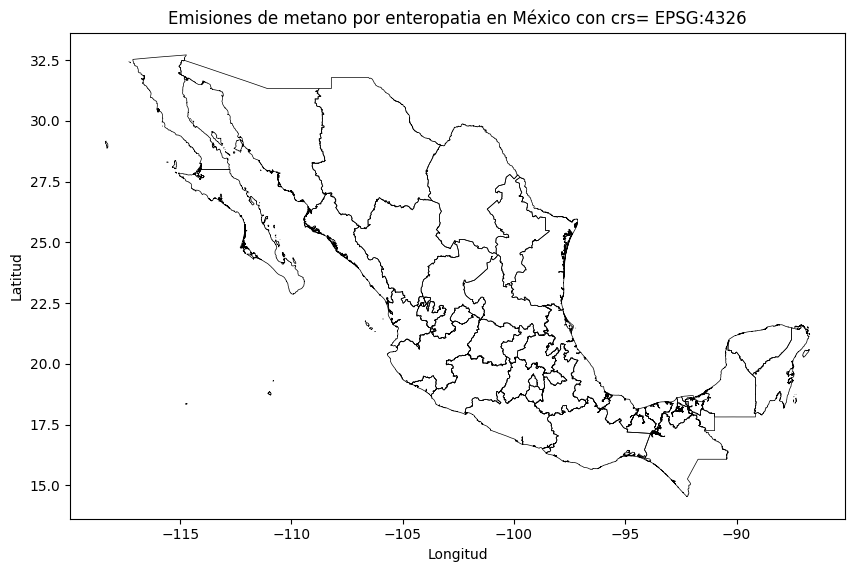

In [31]:
# plot the geometry
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
estados.boundary.plot(ax=ax, color='black', linewidth=0.5)
plt.title(f'Emisiones de metano por enteropatia en México con crs= {estados.crs}')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

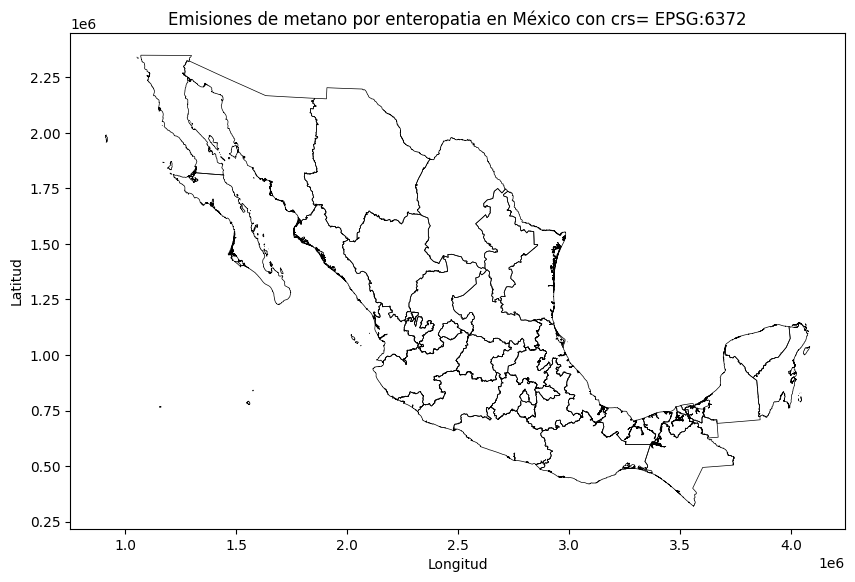

In [32]:
# cambiar la proyección a Lambert Conformal Conic México (p.ej. EPSG:6372).
estados = estados.to_crs(epsg=6372)
# plot the geometry
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
estados.boundary.plot(ax=ax, color='black', linewidth=0.5)
plt.title(f'Emisiones de metano por enteropatia en México con crs= {estados.crs}')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [33]:
estados

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Aguascalientes,MX-AGU,31927357B17004778023462,MEX,ADM1,"MULTIPOLYGON (((2514208.498 1112307.424, 25143..."
1,Baja California,MX-BCN,31927357B35339934753022,MEX,ADM1,"MULTIPOLYGON (((1311406.346 1822297.206, 13118..."
2,Baja California Sur,MX-BCS,31927357B33389180120223,MEX,ADM1,"MULTIPOLYGON (((1658217.258 1385428.864, 16583..."
3,Campeche,MX-CAM,31927357B84428150771724,MEX,ADM1,"MULTIPOLYGON (((3602456.511 739733.752, 360217..."
4,Chiapas,MX-CHP,31927357B65177449444732,MEX,ADM1,"MULTIPOLYGON (((3496262.964 384012.477, 349593..."
5,Chihuahua,MX-CHH,31927357B49801195703560,MEX,ADM1,"MULTIPOLYGON (((2372702.662 1882235.303, 23677..."
6,Coahuila de Zaragoza,MX-COA,31927357B32124965101143,MEX,ADM1,"MULTIPOLYGON (((2331613.993 1630852.462, 23313..."
7,Colima,MX-COL,31927357B75771156097737,MEX,ADM1,"MULTIPOLYGON (((1158658.725 767185.324, 116090..."
8,Distrito Federal,MX-MEX,31927357B79016588373767,MEX,ADM1,"MULTIPOLYGON (((2817139.494 789859.733, 281664..."
9,Durango,MX-DUR,31927357B5285092776894,MEX,ADM1,"MULTIPOLYGON (((2001051.403 1521284.65, 200817..."


In [34]:
# make it geodataframe
municipios_con_estado_sum = gpd.GeoDataFrame(municipios_con_estado_sum, geometry=estados.geometry)

municipios_con_estado_sum.to_file('4-enteric-fermentation-cattle-pasture-emissions-mexico-june-2024.gpkg', layer='municipios_con_estado_sum', driver='GPKG')
municipios_con_estado_sum

,estado,emissions_quantity,activity,emissions_factor,capacity,index_right,geometry
0,Aguascalientes,310.996177,6.664204e+04,0.051333,6.664204e+04,0.0,"MULTIPOLYGON (((2514208.498 1112307.424, 25143..."
1,Baja California,2099.757033,4.499479e+05,0.018667,4.499479e+05,4.0,"MULTIPOLYGON (((1311406.346 1822297.206, 13118..."
2,Baja California Sur,3180.385239,6.815111e+05,0.014000,6.815111e+05,6.0,"MULTIPOLYGON (((1658217.258 1385428.864, 16583..."
3,Campeche,853.434708,1.828789e+05,0.046667,1.828789e+05,30.0,"MULTIPOLYGON (((3602456.511 739733.752, 360217..."
4,Chiapas,1529.917679,3.278395e+05,0.489997,3.278395e+05,420.0,"MULTIPOLYGON (((3496262.964 384012.477, 349593..."
5,Chihuahua,25930.121116,5.556455e+06,0.312667,5.556455e+06,335.0,"MULTIPOLYGON (((2372702.662 1882235.303, 23677..."
6,Coahuila de Zaragoza,15388.870045,3.297615e+06,0.177333,3.297615e+06,228.0,"MULTIPOLYGON (((2331613.993 1630852.462, 23313..."
7,Colima,150.953436,3.234716e+04,0.037333,3.234716e+04,56.0,"MULTIPOLYGON (((1158658.725 767185.324, 116090..."
8,Distrito Federal,0.260443,5.580929e+01,0.023332,5.580929e+01,40.0,"MULTIPOLYGON (((2817139.494 789859.733, 281664..."
9,Durango,5420.628825,1.161563e+06,0.182000,1.161563e+06,351.0,"MULTIPOLYGON (((2001051.403 1521284.65, 200817..."
